# TASK 2: Customer Segmentation

Saving Mall_Customers.csv to Mall_Customers.csv


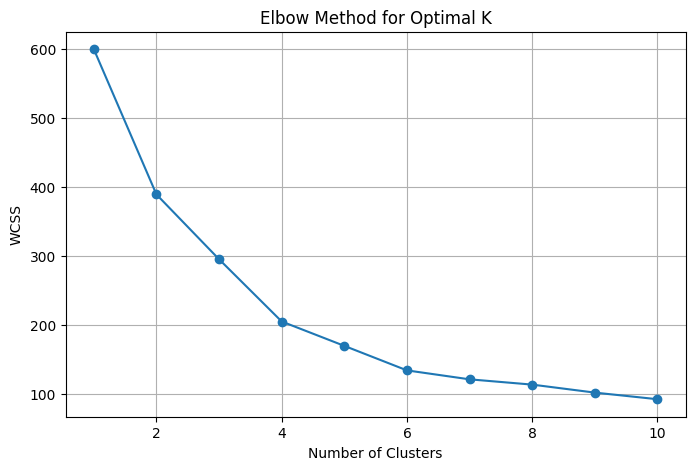

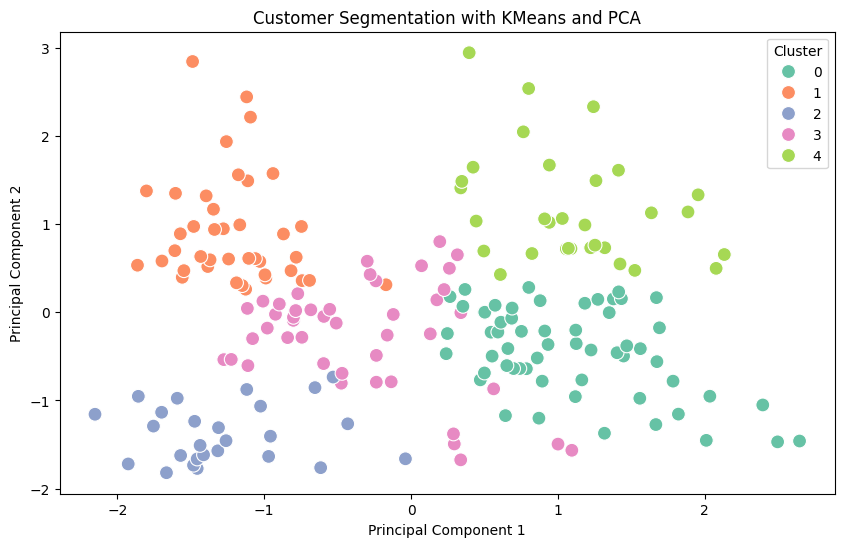


Cluster Centroids:

     Age  Annual Income (k$)  Spending Score (1-100)
0  55.28               47.62                   41.71
1  32.88               86.10                   81.53
2  25.77               26.12                   74.85
3  26.73               54.31                   40.91
4  44.39               89.77                   18.48


In [ ]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import files

# Step 2: Upload Dataset
uploaded = files.upload()

# Step 3: Load the uploaded CSV
df = pd.read_csv("Mall_Customers.csv")

# Step 4: Feature Selection
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Find Optimal K using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Step 7: Apply KMeans Clustering (Assume K=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 8: Reduce Dimensions using PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# Step 9: Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segmentation with KMeans and PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 10: Cluster Centers in Original Scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
print("\nCluster Centroids:\n")
print(centroid_df.round(2))
